 # ATSC 409 Mini-project 1

## Section I:
The function mp1 outputs values for depth d and temperature as a function of depth x, given N discrete points, ice concentration B, light attenuation rate a, and salinity level h.

In [176]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
def mp1(N, b, a, h):
    ##### Inputs:
    ##### N = number of discrete depth steps
    ##### b = ice concentration
    ##### a = light attenuation rate
    ##### h = depth at which water salinity begins to differ

    ##### Initialize constants.
    Cp = 4e6
    Amax = 1e-2
    Adepth = 1e-4
    Adip = 1.5e-3

    ##### Set grid spacing and depth values.
    s = 200/N
    d = np.arange(0, 200.5, s)

    ##### Write functions that compute values for Ah and dAh.
    def Ah(d):
        if d <= h:
            return Amax 
        return Adepth + (Amax - Adepth - Adip*(d-h))*np.exp(-0.5*(d-h))
    
    def dAh(d):
        if d <= h:
            return 0
        return (-1*Adip - 0.5*(Amax - Adepth - Adip*(d-h)))*np.exp(-0.5*(d-h))

    ##### Write a function that computes the right-hand side of the equation.
    def rhs(d):
        rs = -2*s*s*a*(1-b)*90*np.exp(-1*a*d)/Cp
        rs[0] = -1
        rs[N] = -2
        return rs

    ##### Write a function that computes the differential system matrix.
    def lhs(N):
        m = np.zeros((N+1, N+1))
        m[0, 0] = m[N, N] = 1
        for i in range(1,N):
            m[i, i-1] = s*dAh(d[i]) + 2*Ah(d[i]) 
            m[i, i+1] = -1*s*dAh(d[i]) + 2*Ah(d[i])
            m[i, i] = -4*Ah(d[i])
        return m

    ##### Solve the system.
    x = np.linalg.solve(lhs(N), rhs(d))

    ##### Check the properties of the differential system matrix.
    ls = lhs(N)
    lsi = np.linalg.inv(ls)
    c = np.linalg.cond(ls)
    mse = ((ls*lsi - np.identity(N+1))**2).mean(axis = None)

    ##### Print the condition number of the differential system matrix and the
    ##### mean squared difference between the identity matrix and the product
    ##### of the differential system matrix and its inverse. A system is
    ##### "better" if it has low condition number and the difference between 
    ##### the identity matrix and the product of the system and its inverse is
    ##### low. For a well-conditioned matrix A, it is expected that A'*A ~ I. 
    print([c, mse])
    
    ##### At the end of the function, print c and mse, and return d and x.
    return [d, x]

## Section II:
Run simulations with varying number of discrete points N. Use the starting parameters for B, a and h.

[3209099.6839017998, 430.91834620752121]
[11328626.466822557, 270.16447395252794]
[18450510.376806419, 189.54960036313648]
[41574542.830344468, 235.23051939920745]
[70286517.815029308, 277.11467932345442]
[281348440.13487738, 543.93407589187564]


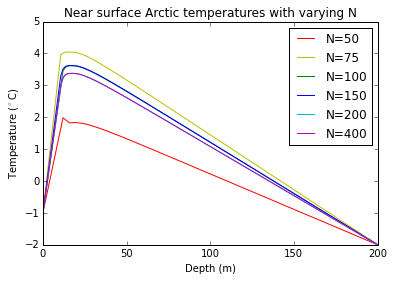

In [178]:
n1 = mp1(50, 0.5, 0.1, 10)
n2 = mp1(75, 0.5, 0.1, 10)
n3 = mp1(100, 0.5, 0.1, 10)
n4 = mp1(150, 0.5, 0.1, 10)
n5 = mp1(200, 0.5, 0.1, 10)
n6 = mp1(400, 0.5, 0.1, 10)
plt.close()
plt.plot(n1[0], n1[1], 'r')
plt.plot(n2[0], n2[1], 'y')
plt.plot(n3[0], n3[1], 'g')
plt.plot(n4[0], n4[1], 'b')
plt.plot(n5[0], n5[1], 'c')
plt.plot(n6[0], n6[1], 'm')
plt.xlabel('Depth (m)')
plt.ylabel('Temperature ($^\circ$C)')
plt.title('Near surface Arctic temperatures with varying N')
plt.legend(['N=50', 'N=75', 'N=100', 'N=150','N=200','N=400'])

## Section III:
Using N=100, run simulations with varying levels of salinity h.

[18450510.376806419, 189.54960036313648]
[17603009.918937765, 175.58215207035028]
[14999761.721642343, 132.60353108959995]
[9800463.2631244827, 62.651532246452767]
[1904808.3351187359, 12.799536961820177]
[50674.911354138472, 18.641865384186001]


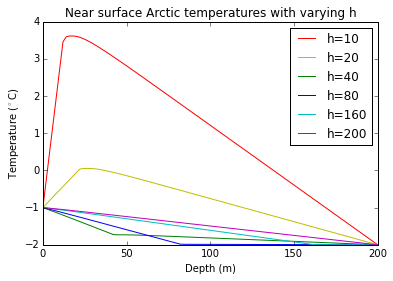

In [179]:
h1 = mp1(100, 0.5, 0.1, 10)
h2 = mp1(100, 0.5, 0.1, 20)
h3 = mp1(100, 0.5, 0.1, 40)
h4 = mp1(100, 0.5, 0.1, 80)
h5 = mp1(100, 0.5, 0.1, 160)
h6 = mp1(100, 0.5, 0.1, 200)
plt.close()
plt.plot(h1[0], h1[1], 'r')
plt.plot(h2[0], h2[1], 'y')
plt.plot(h3[0], h3[1], 'g')
plt.plot(h4[0], h4[1], 'b')
plt.plot(h5[0], h5[1], 'c')
plt.plot(h6[0], h6[1], 'm')
plt.xlabel('Depth (m)')
plt.ylabel('Temperature ($^\circ$C)')
plt.title('Near surface Arctic temperatures with varying h')
plt.legend(['h=10', 'h=20', 'h=40', 'h=80', 'h=160', 'h=200'])

## Section IV:
Using N=100, explore temp profiles for various ice concentrations B.

[18450510.376806419, 189.54960036313648]
[18450510.376806419, 189.54960036313648]
[18450510.376806419, 189.54960036313648]
[18450510.376806419, 189.54960036313648]
[18450510.376806419, 189.54960036313648]
[18450510.376806419, 189.54960036313648]


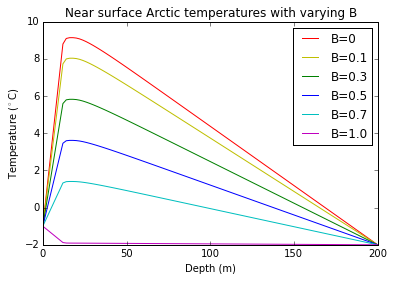

In [180]:
b1 = mp1(100, 0.0, 0.1, 10) 
b2 = mp1(100, 0.1, 0.1, 10) 
b3 = mp1(100, 0.3, 0.1, 10) 
b4 = mp1(100, 0.5, 0.1, 10) 
b5 = mp1(100, 0.7, 0.1, 10) 
b6 = mp1(100, 1.0, 0.1, 10)
plt.close()
plt.plot(b1[0], b1[1], 'r')
plt.plot(b2[0], b2[1], 'y')
plt.plot(b3[0], b3[1], 'g')
plt.plot(b4[0], b4[1], 'b')
plt.plot(b5[0], b5[1], 'c')
plt.plot(b6[0], b6[1], 'm')
plt.xlabel('Depth (m)')
plt.ylabel('Temperature ($^\circ$C)')
plt.title('Near surface Arctic temperatures with varying B')
plt.legend(['B=0', 'B=0.1', 'B=0.3', 'B=0.5', 'B=0.7', 'B=1.0'])

## Section V:
Using N=100, explore temp profiles for various light attenuation rates a.

[18450510.376806419, 189.54960036313648]
[18450510.376806419, 189.54960036313648]
[18450510.376806419, 189.54960036313648]
[18450510.376806419, 189.54960036313648]
[18450510.376806419, 189.54960036313648]
[18450510.376806419, 189.54960036313648]


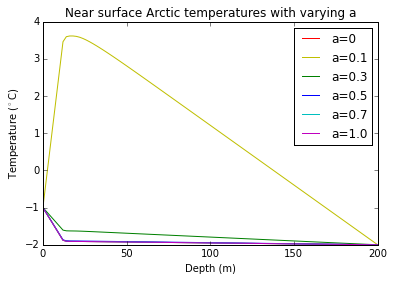

In [181]:
a1 = mp1(100, 0.5, 0.0, 10) 
a2 = mp1(100, 0.5, 0.1, 10) 
a3 = mp1(100, 0.5, 0.3, 10) 
a4 = mp1(100, 0.5, 0.5, 10) 
a5 = mp1(100, 0.5, 0.7, 10) 
a6 = mp1(100, 0.5, 1.0, 10) 
plt.close()
plt.plot(a1[0], a1[1], 'r')
plt.plot(a2[0], a2[1], 'y')
plt.plot(a3[0], a3[1], 'g')
plt.plot(a4[0], a4[1], 'b')
plt.plot(a5[0], a5[1], 'c')
plt.plot(a6[0], a6[1], 'm')
plt.xlabel('Depth (m)')
plt.ylabel('Temperature ($^\circ$C)')
plt.title('Near surface Arctic temperatures with varying a')
plt.legend(['a=0', 'a=0.1', 'a=0.3', 'a=0.5', 'a=0.7', 'a=1.0'])